In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing  import  scale
from sklearn.decomposition  import PCA
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from sklearn.metrics import silhouette_score, homogeneity_score

# Data Preperation

In [4]:
csv0= pd.read_csv("0.csv")
csv1= pd.read_csv("1.csv")
csv2= pd.read_csv("2.csv")
csv3= pd.read_csv("3.csv")
allFiles=['0.csv', '1.csv', '2.csv','3.csv']
list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
data = pd.concat(list)

In [5]:
y = data[64]
X= data.drop(columns=64)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

# T-SNE

In [7]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=2,perplexity=100)
x_tsne = tsne.fit_transform(X_scaled)

## Plot for t-SNE

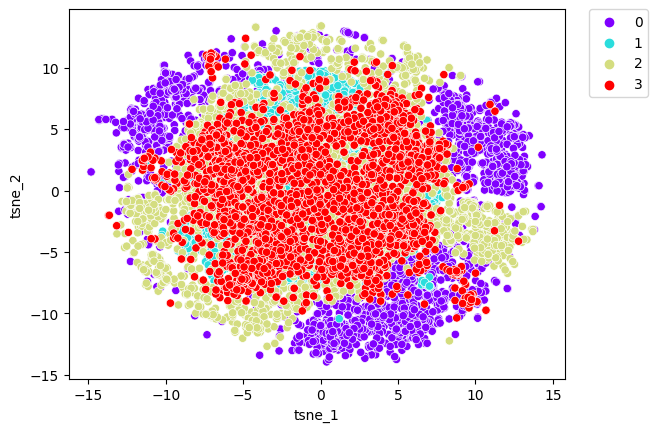

In [63]:
import seaborn as sns
X_isomap_df = pd.DataFrame({'tsne_1': x_tsne[:,0], 'tsne_2': x_tsne[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label',palette='rainbow', data=x_tsne_df, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## Pairplot for t-SNE

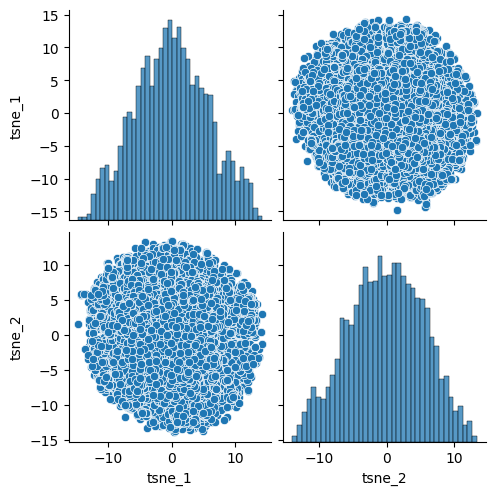

In [64]:
x_tsne_df = pd.DataFrame({'tsne_1': x_tsne[:,0], 'tsne_2': x_tsne[:,1]})
sns.pairplot(x_tsne_df)

# Spectral Clustering with RBF

## Comparison between Spectral Clustering n_clusters and t-SNE

rbf: 10 
 Silhouette score: 0.208 
 Homogeneity score: 0.240


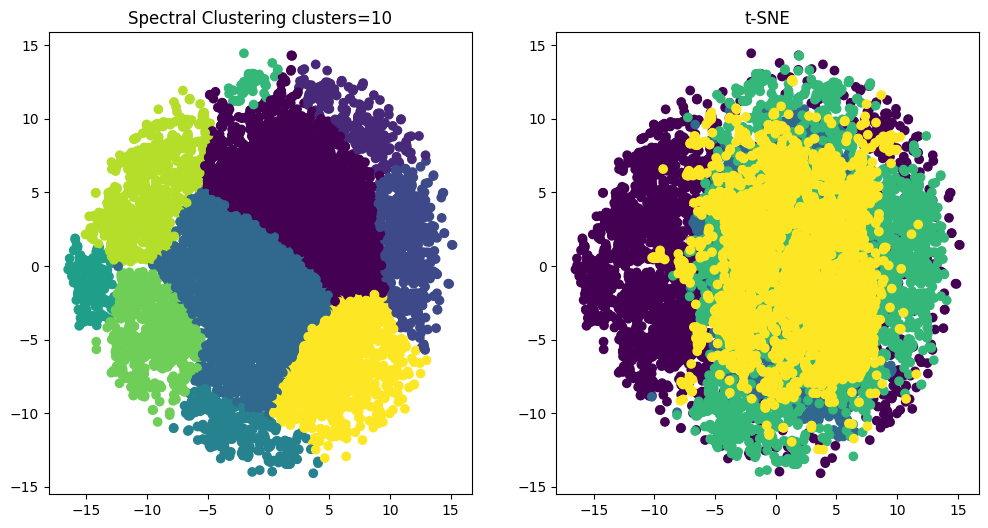

rbf: 15 
 Silhouette score: 0.227 
 Homogeneity score: 0.243


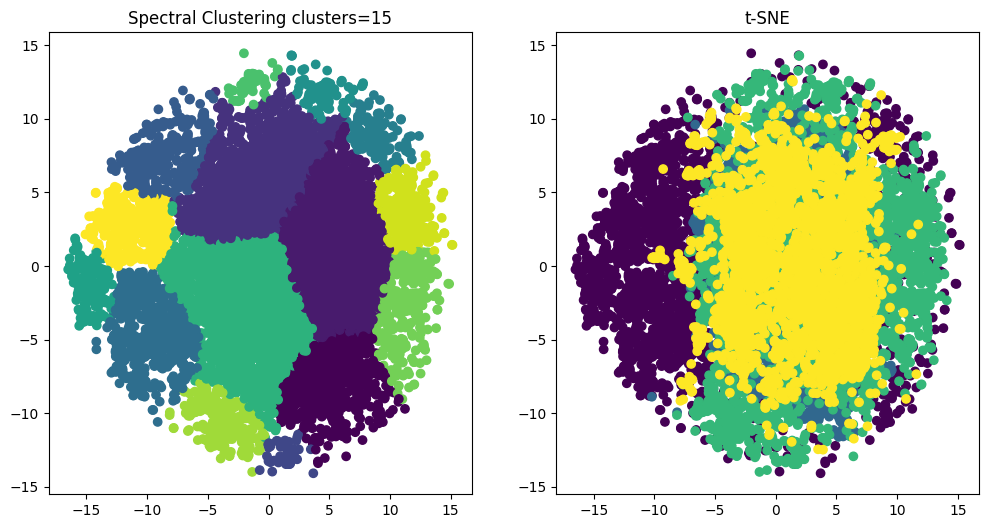

rbf: 20 
 Silhouette score: 0.182 
 Homogeneity score: 0.260


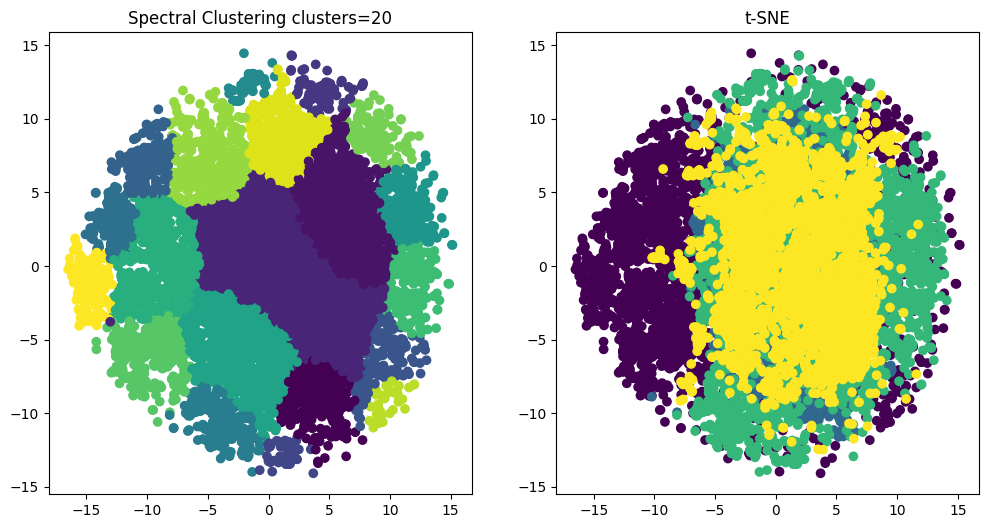

In [19]:
from sklearn.cluster import SpectralClustering
for i in range(10,25,5):
    sc = SpectralClustering(n_clusters=i,affinity='rbf',assign_labels='kmeans')
    labels_rbf = sc.fit_predict(x_tsne)
    silhouette = silhouette_score(x_tsne, labels_rbf)
    homogeneity = homogeneity_score(y, labels_rbf)
    print("rbf: {} \n Silhouette score: {:.3f} \n Homogeneity score: {:.3f}".format(i, silhouette, homogeneity))
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Create a scatter plot of the clustered data in the first subplot
    ax[0].scatter(x_tsne[:, 0],x_tsne[:, 1], c=labels_rbf)
    ax[0].set_title("Spectral Clustering clusters={}".format(i))

    # Create a scatter plot of the t-SNE reduced data in the second subplot
    ax[1].scatter(x_tsne[:, 0], x_tsne[:, 1],c=y)
    ax[1].set_title("t-SNE")

    plt.show()

# Specral Clustering with nearest neighbors

## Comparison between Spectral Clustering n_neighbors and t-SNE

C:\Users\vaasimak\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_neighbors: 5 
 Silhouette score: -0.191 
 Homogeneity score: 0.013


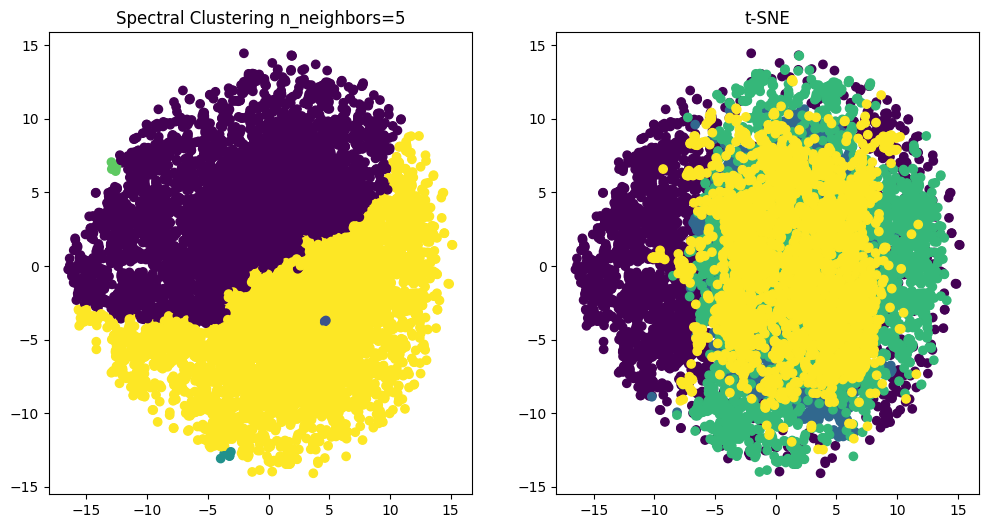

n_neighbors: 10 
 Silhouette score: 0.319 
 Homogeneity score: 0.179


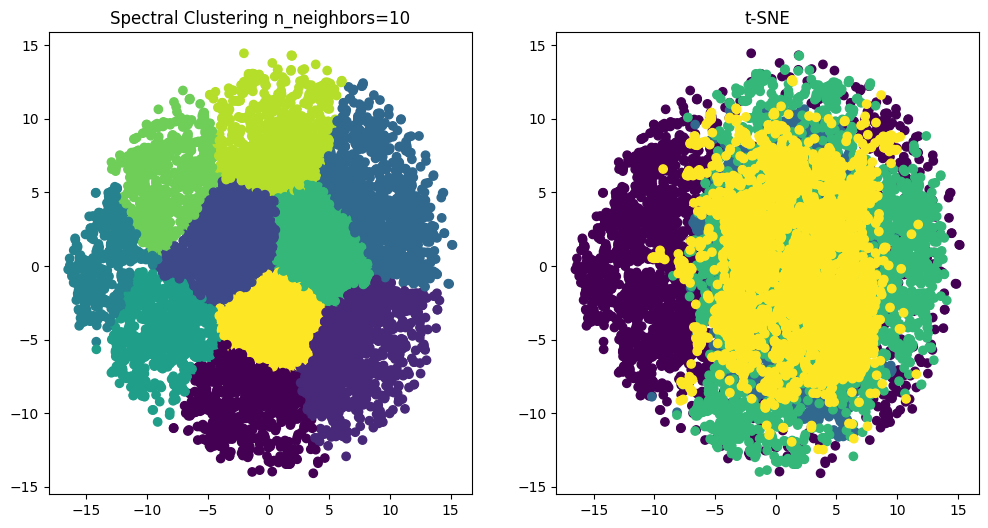

n_neighbors: 15 
 Silhouette score: 0.328 
 Homogeneity score: 0.227


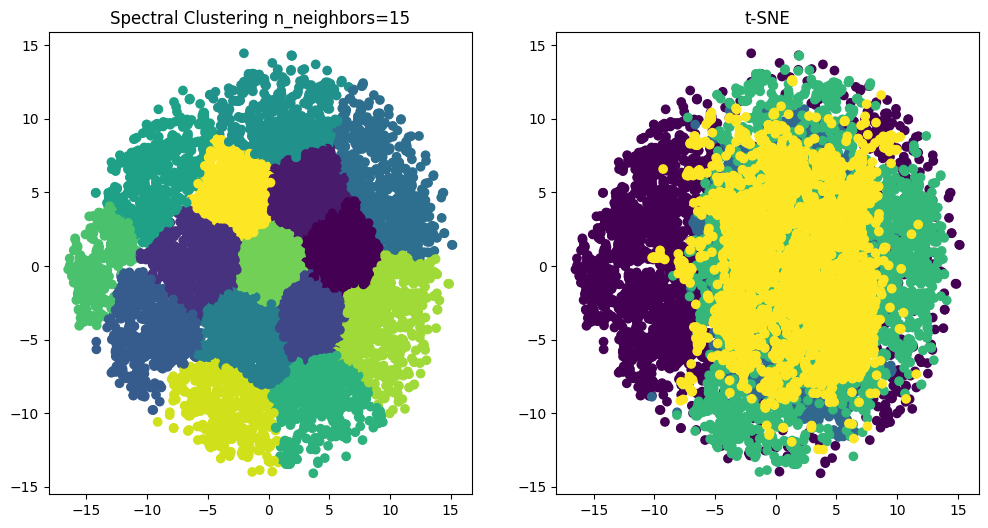

n_neighbors: 20 
 Silhouette score: 0.321 
 Homogeneity score: 0.266


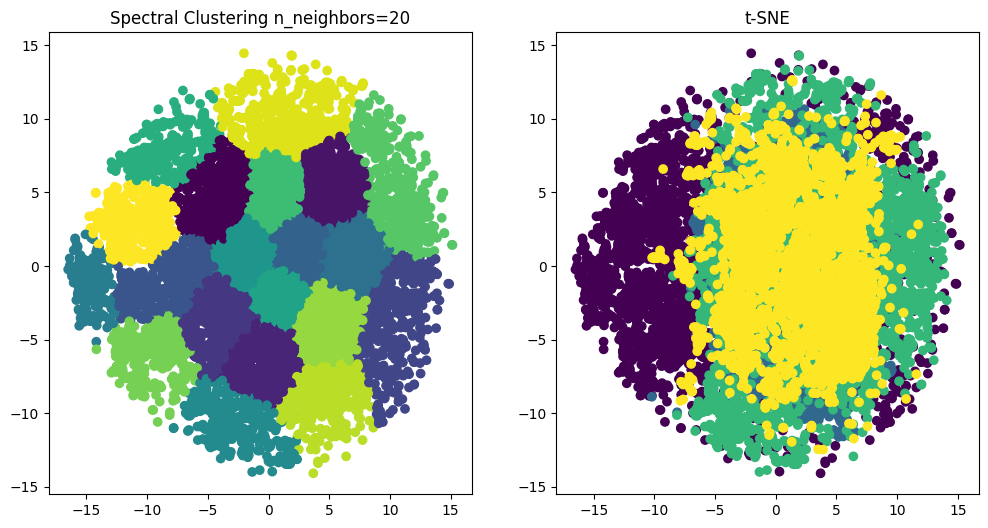

n_neighbors: 25 
 Silhouette score: 0.336 
 Homogeneity score: 0.290


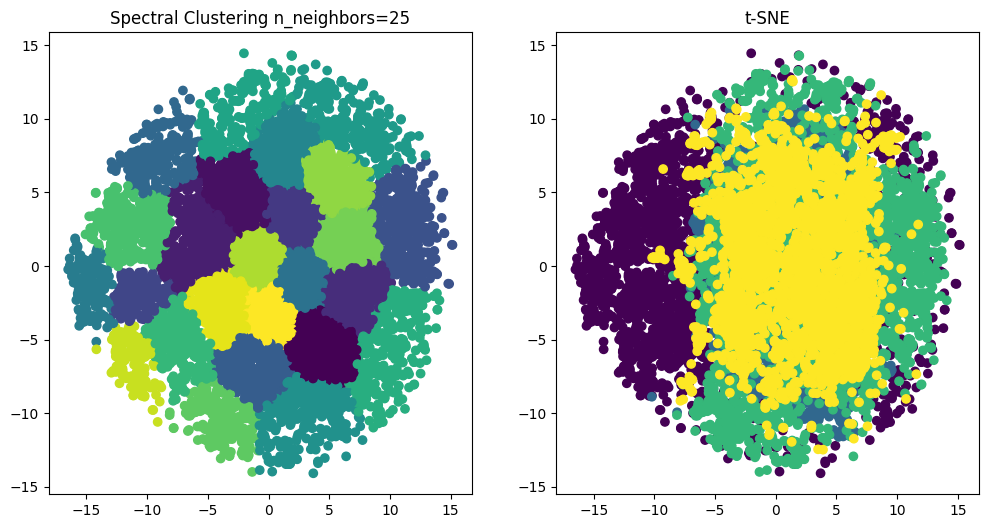

n_neighbors: 30 
 Silhouette score: 0.337 
 Homogeneity score: 0.303


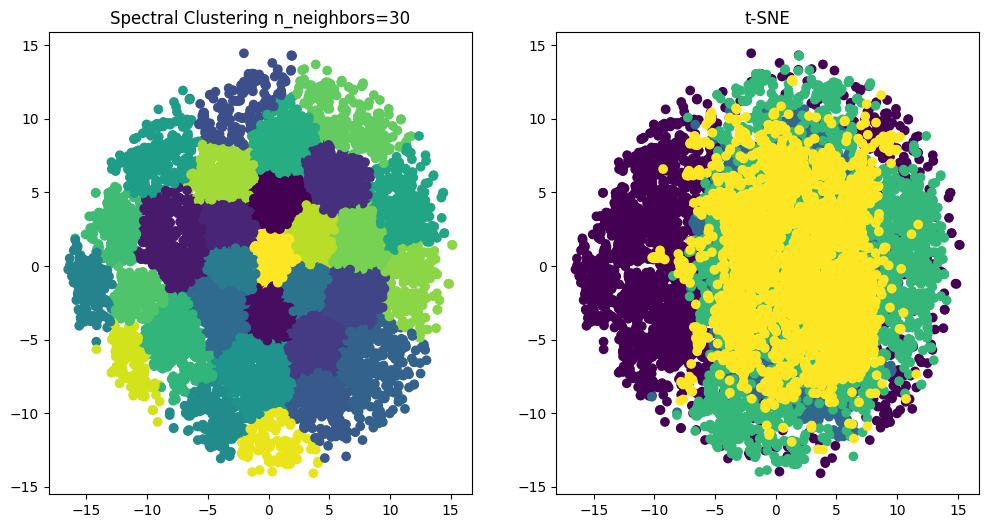

n_neighbors: 35 
 Silhouette score: 0.333 
 Homogeneity score: 0.306


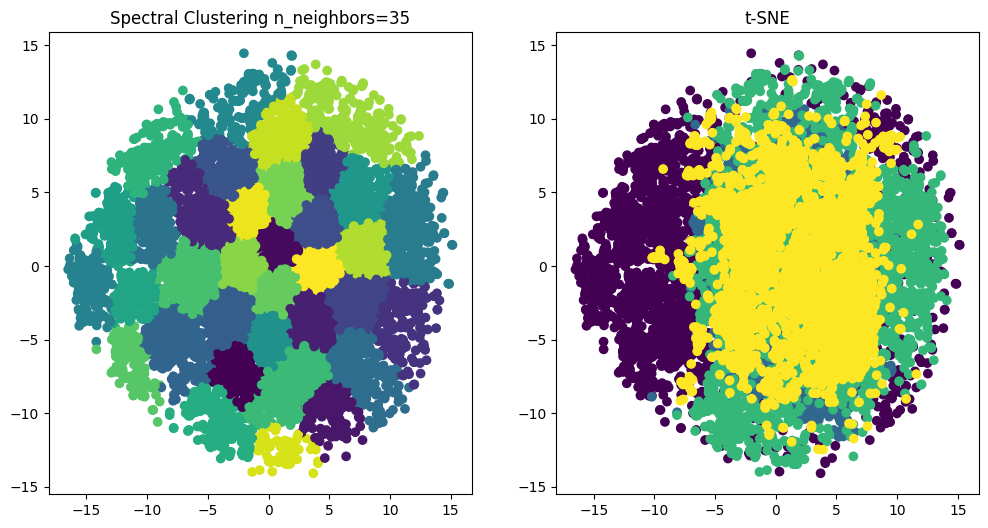

In [22]:
for i in range(5,40,5):
    sc = SpectralClustering(n_clusters=i,affinity='nearest_neighbors',assign_labels='kmeans',n_neighbors=i,n_jobs=-1)
    labels_nn = sc.fit_predict(x_tsne)
    silhouette = silhouette_score(x_tsne, labels_nn)
    homogeneity = homogeneity_score(y, labels_nn)
    print("n_neighbors: {} \n Silhouette score: {:.3f} \n Homogeneity score: {:.3f}".format(i, silhouette, homogeneity))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Create a scatter plot of the clustered data in the first subplot
    ax[0].scatter(x_tsne[:, 0],x_tsne[:, 1], c=labels_nn)
    ax[0].set_title("Spectral Clustering n_neighbors={}".format(i))

    # Create a scatter plot of the t-SNE reduced data in the second subplot
    ax[1].scatter(x_tsne[:, 0], x_tsne[:, 1],c=y)
    ax[1].set_title("t-SNE")

    plt.show()

# Isomap

## Plots for different values of Isomap n_neigbors

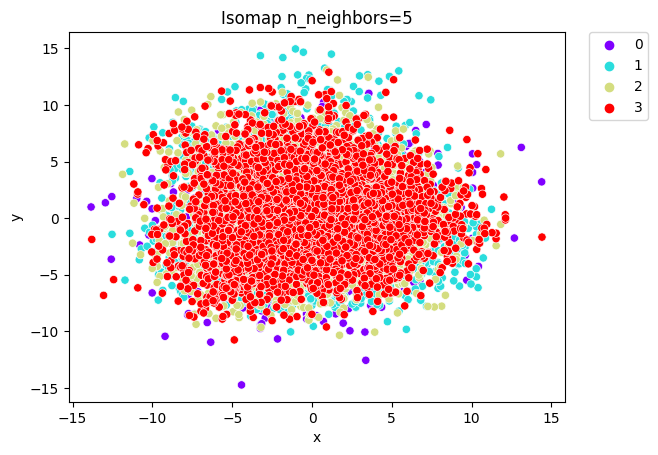

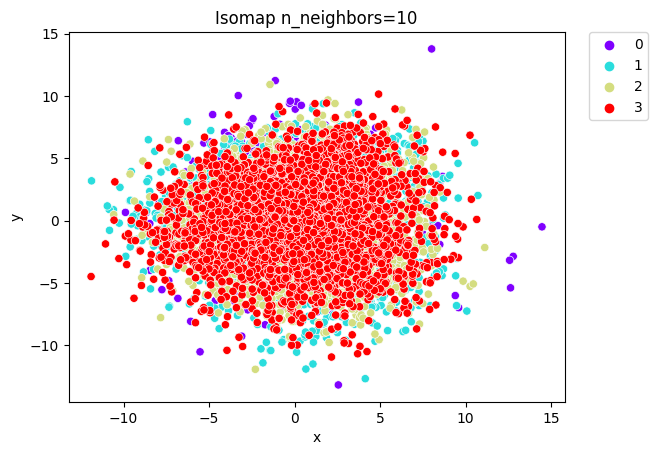

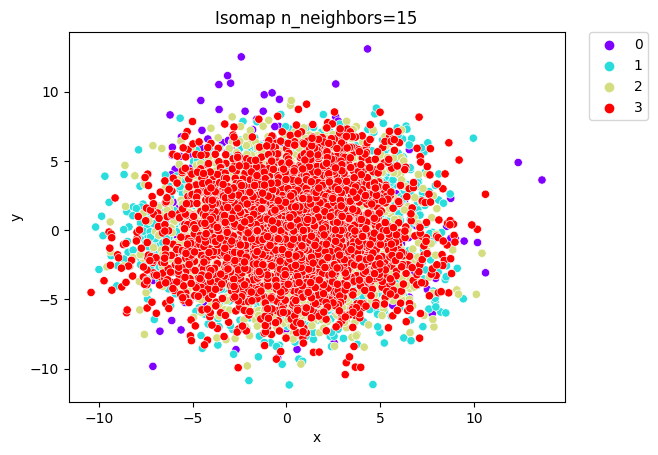

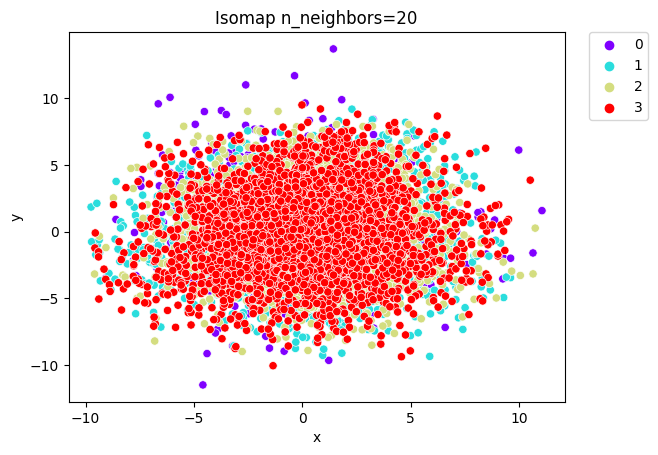

In [77]:
from sklearn.manifold import Isomap
for i in range(5,25,5):
    isomap = Isomap(n_components=2, n_neighbors=i,n_jobs=-1)
    X_isomap = isomap.fit_transform(X_scaled)
    x_isomap_df = pd.DataFrame({'x': X_isomap[:,0], 'y': X_isomap[:,1], 'label': y})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='x', y='y', hue='label',palette='rainbow', data=x_isomap_df, ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_title("Isomap n_neighbors={}".format(i))
    plt.show()
    

## Pairplot for Isomaps different n_neighbors

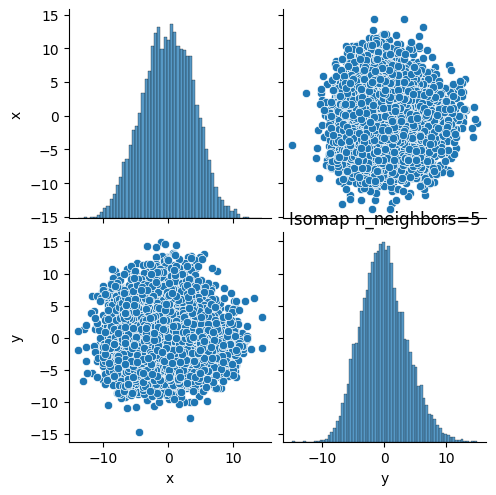

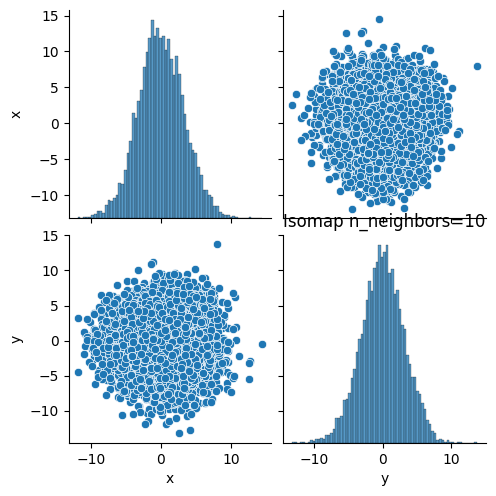

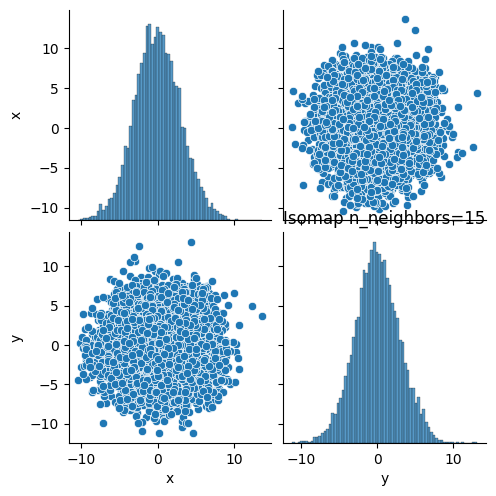

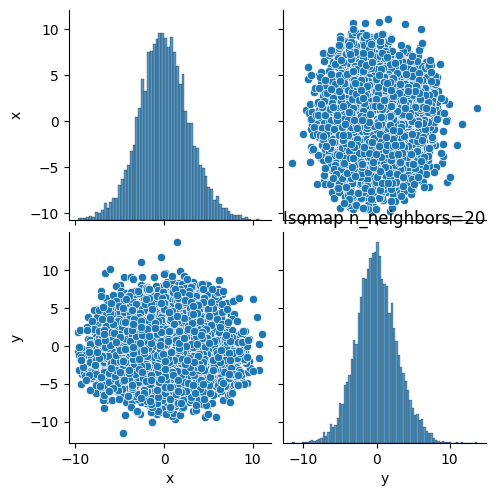

In [79]:
from sklearn.manifold import Isomap
for i in range(5,25,5):
    isomap = Isomap(n_components=2, n_neighbors=i,n_jobs=-1)
    X_isomap = isomap.fit_transform(X_scaled)
    x_isomap_df = pd.DataFrame({'x': X_isomap[:,0], 'y': X_isomap[:,1], 'label': y})
    sns.pairplot(x_isomap_df.drop(columns = 'label'))
    plt.title("Isomap n_neighbors={}".format(i))
    plt.show()

In [9]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=5,n_jobs=-1)
X_isomap = isomap.fit_transform(X_scaled)

# Spectral Clustering with RBF

## Comparison between Spectral Clustering n_clusters and t-SNE

rbf: 10 
 Silhouette score: 0.103 
 Homogeneity score: 0.012


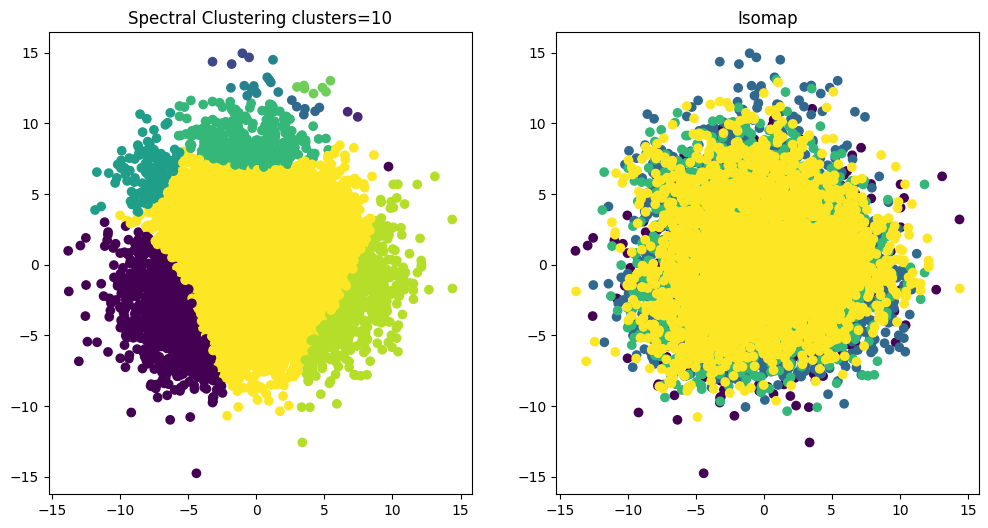

rbf: 15 
 Silhouette score: 0.004 
 Homogeneity score: 0.012


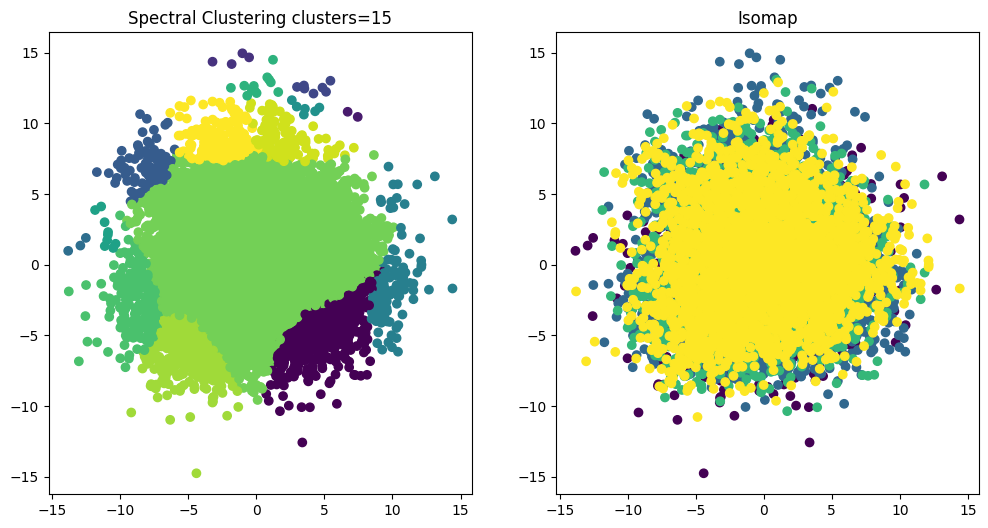

rbf: 20 
 Silhouette score: 0.013 
 Homogeneity score: 0.012


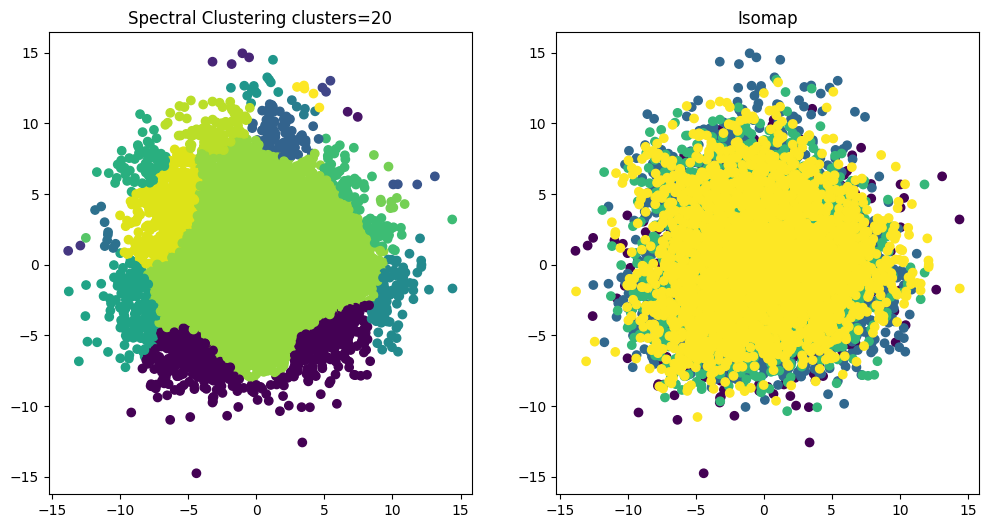

In [20]:
from sklearn.cluster import SpectralClustering
for i in range(10,25,5):
    sc = SpectralClustering(n_clusters=i,affinity='rbf',assign_labels='kmeans')
    labels_rbf = sc.fit_predict(X_isomap)
    silhouette = silhouette_score(X_isomap, labels_rbf)
    homogeneity = homogeneity_score(y, labels_rbf)
    print("rbf: {} \n Silhouette score: {:.3f} \n Homogeneity score: {:.3f}".format(i, silhouette, homogeneity))
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Create a scatter plot of the clustered data in the first subplot
    ax[0].scatter(X_isomap[:, 0],X_isomap[:, 1], c=labels_rbf)
    ax[0].set_title("Spectral Clustering clusters={}".format(i))

    # Create a scatter plot of the t-SNE reduced data in the second subplot
    ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1],c=y)
    ax[1].set_title("Isomap")

    plt.show()

# Spectral Clustering with nearest neighbors

## Comparison between Spectral Clustering n_neighbors and t-SNE

C:\Users\vaasimak\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_neighbors: 5 
 Silhouette score: -0.036 
 Homogeneity score: 0.003


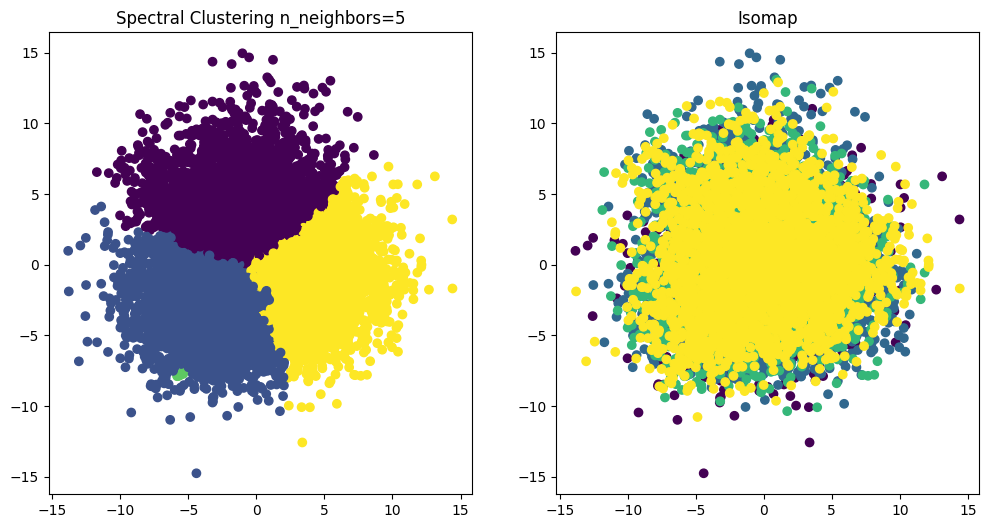

n_neighbors: 10 
 Silhouette score: 0.277 
 Homogeneity score: 0.016


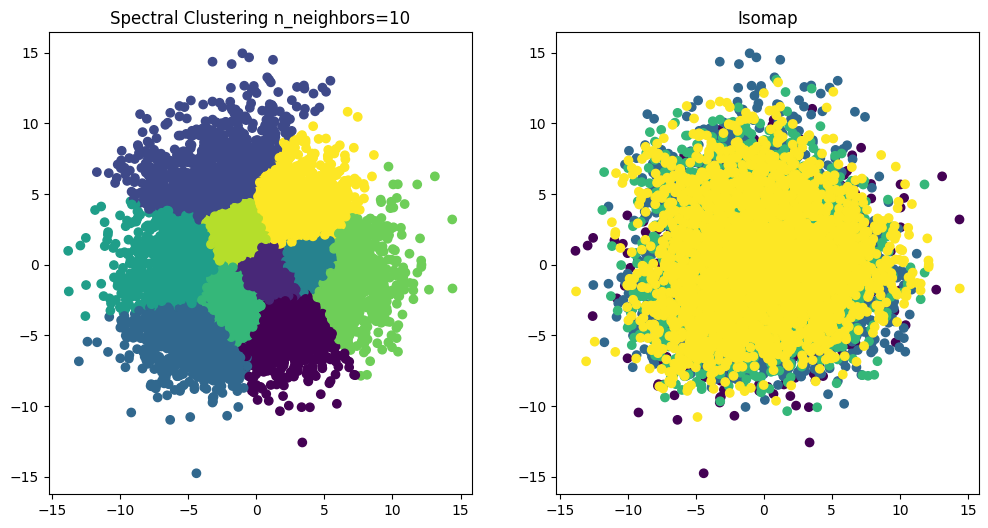

n_neighbors: 15 
 Silhouette score: 0.301 
 Homogeneity score: 0.020


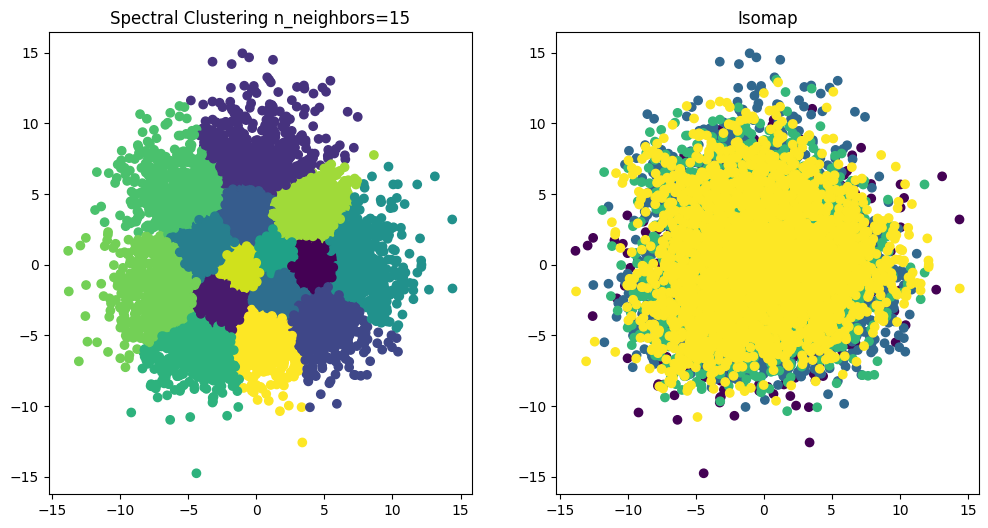

n_neighbors: 20 
 Silhouette score: 0.282 
 Homogeneity score: 0.022


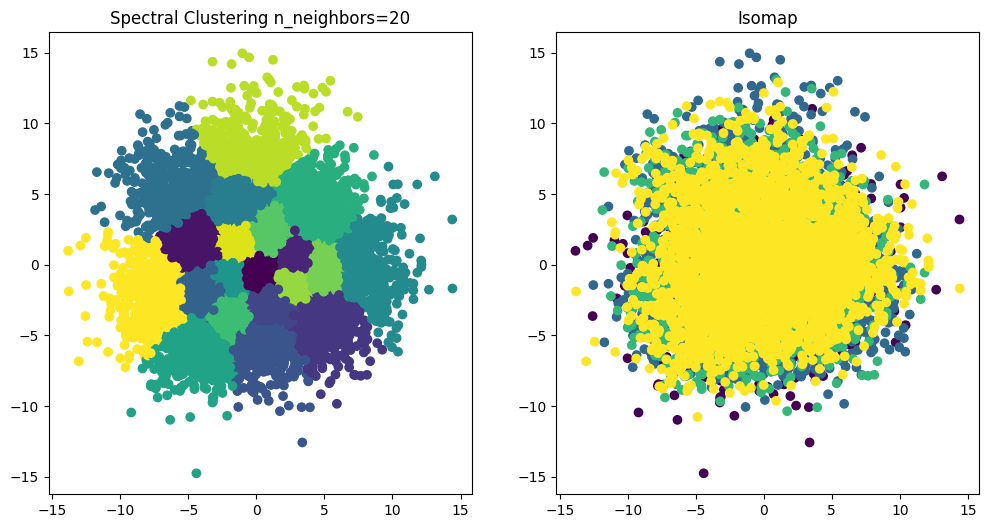

n_neighbors: 25 
 Silhouette score: 0.288 
 Homogeneity score: 0.024


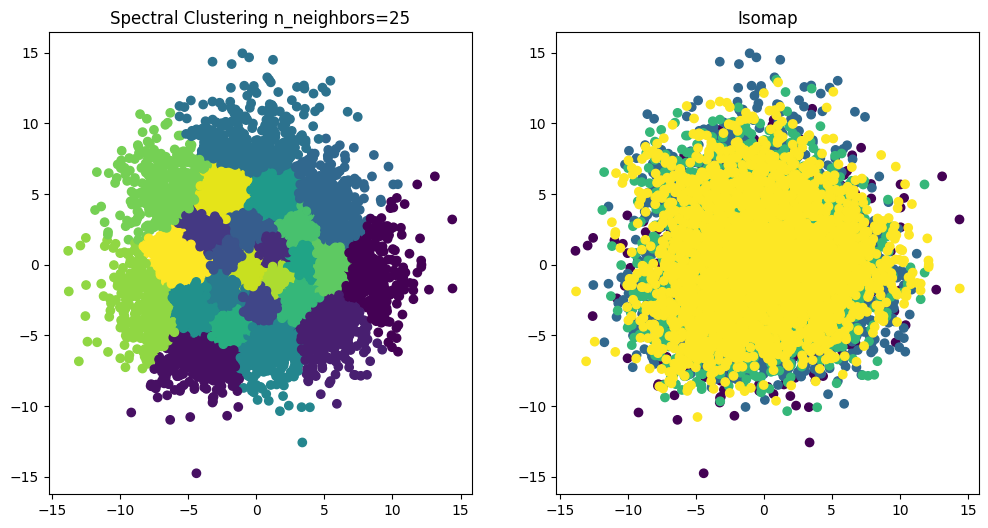

n_neighbors: 30 
 Silhouette score: 0.289 
 Homogeneity score: 0.025


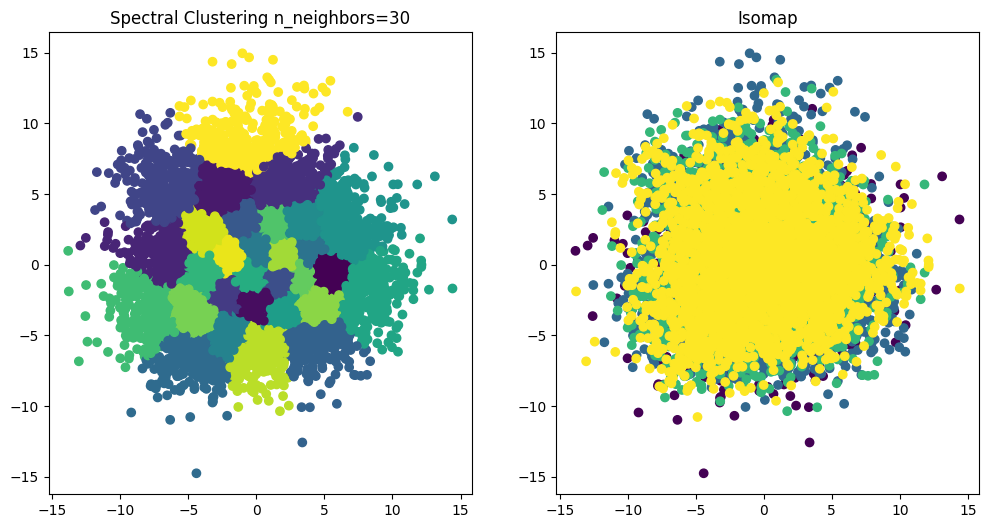

n_neighbors: 35 
 Silhouette score: 0.288 
 Homogeneity score: 0.026


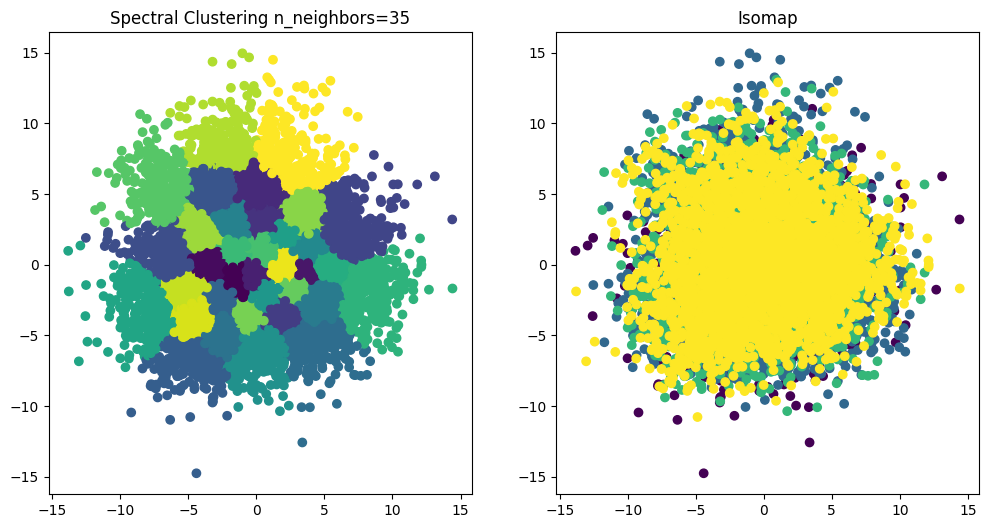

In [23]:
for i in range(5,40,5):
    sc = SpectralClustering(n_clusters=i,affinity='nearest_neighbors',assign_labels='kmeans',n_neighbors=i,n_jobs=-1)
    labels_nn = sc.fit_predict(X_isomap)
    silhouette = silhouette_score(X_isomap, labels_nn)
    homogeneity = homogeneity_score(y, labels_nn)
    print("n_neighbors: {} \n Silhouette score: {:.3f} \n Homogeneity score: {:.3f}".format(i, silhouette, homogeneity))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Create a scatter plot of the clustered data in the first subplot
    ax[0].scatter(X_isomap[:, 0],X_isomap[:, 1], c=labels_nn)
    ax[0].set_title("Spectral Clustering n_neighbors={}".format(i))

    # Create a scatter plot of the t-SNE reduced data in the second subplot
    ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1],c=y)
    ax[1].set_title("Isomap")

    plt.show()